<a href="https://colab.research.google.com/github/Jayapriya208/Brain-Tumor-classification/blob/main/Fake_Currency_Detection_with_Machine_Learning(NEW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake Currency Detection with Machine Learning**

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

**LOADING THE DATASET**

In [ ]:
data = pd.read_csv('/content/data_banknote_authentication.txt')
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'authentication']
print(data.head())

   variance  skewness  curtosis  entropy  authentication
0   4.54590    8.1674   -2.4586 -1.46210               0
1   3.86600   -2.6383    1.9242  0.10645               0
2   3.45660    9.5228   -4.0112 -3.59440               0
3   0.32924   -4.4552    4.5718 -0.98880               0
4   4.36840    9.6718   -3.9606 -3.16250               0


In [ ]:
data.shape

(1371, 5)

**Data Exploration**

In [ ]:
print(data.info)

<bound method DataFrame.info of       variance  skewness  curtosis  entropy  authentication
0      4.54590   8.16740   -2.4586 -1.46210               0
1      3.86600  -2.63830    1.9242  0.10645               0
2      3.45660   9.52280   -4.0112 -3.59440               0
3      0.32924  -4.45520    4.5718 -0.98880               0
4      4.36840   9.67180   -3.9606 -3.16250               0
...        ...       ...       ...      ...             ...
1366   0.40614   1.34920   -1.4501 -0.55949               1
1367  -1.38870  -4.87730    6.4774  0.34179               1
1368  -3.75030 -13.45860   17.5932 -2.77710               1
1369  -3.56370  -8.38270   12.3930 -1.28230               1
1370  -2.54190  -0.65804    2.6842  1.19520               1

[1371 rows x 5 columns]>


**VISUALIING THE DATASET**

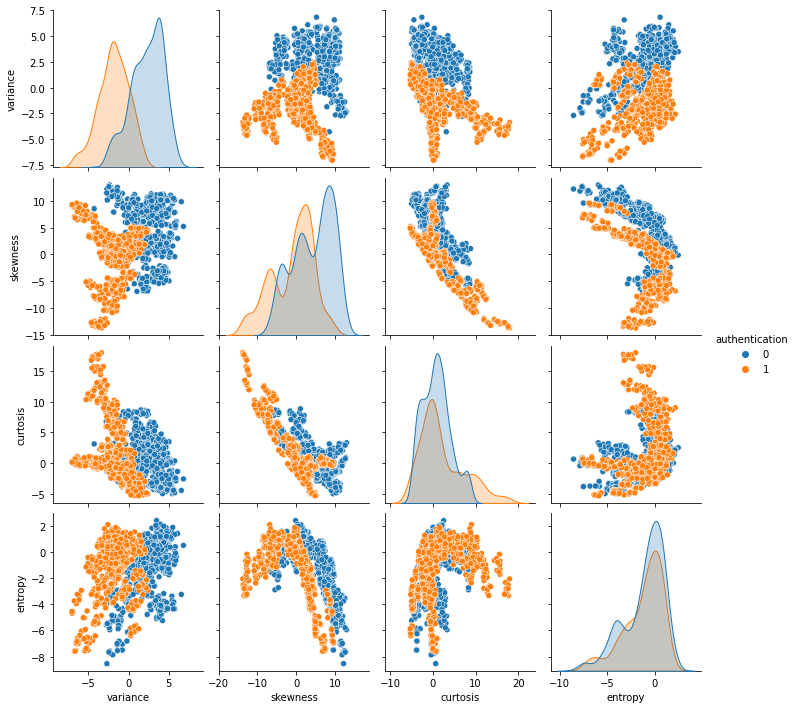

In [ ]:
sns.pairplot(data, hue='authentication')
plt.show()

**visualising the target variable**

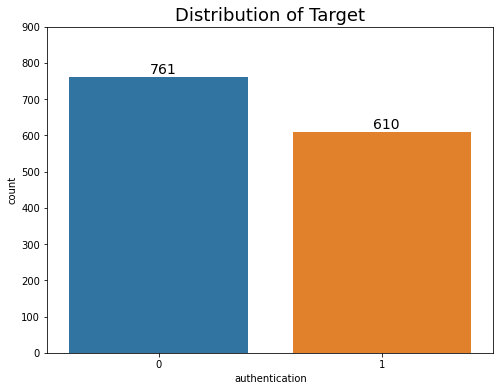

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['authentication'])
target_count=data.authentication.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

**Data cleaning**

In [ ]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='authentication')
data = data[nb_to_delete:]
print(data['authentication'].value_counts())

1    610
0    610
Name: authentication, dtype: int64


In [ ]:
#divide data into features and label set
X = data.drop(["authentication"], axis = 1)
y = data.filter(["authentication"], axis = 1)

**SPLITTING INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)


**DATA PREPROCESSING**

In [ ]:
#applying scaling on training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

**MODEL BUILDING**

In [ ]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression
 
#training the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
 
#making predicions on test set
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**EVALUATING THE MODEL**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9901639344262295


In [ ]:
data.loc[50]

variance          5.2620
skewness          3.9834
curtosis         -1.5572
entropy           1.0103
authentication    0.0000
Name: 50, dtype: float64

In [ ]:
#predicted model 
y_pred = np.array(classifier.predict(X_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            158              2
Act.Positive              1            144

 Accuracy = 99.02%


**PREDICTED MODEL**

In [ ]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scaler.transform(new_banknote)
print(f'Prediction:  Class{classifier.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {classifier.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.66534666 0.33465334]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
